In [1]:
import pandas as pd

In [2]:
DF=pd.read_csv('./data/decade.csv',header=None)
DF

,0,1,2,3,4,5,6,7,8,9,10
0,고양오리온스,24/46,3/14,23/26,1/1,12,15,23,7,5,18
1,서울삼성,22/47,4/20,9/12,1/1,12,13,20,4,3,27
2,안양 KGC,28/49,2/11,9/16,3/3,14,10,20,3,4,16
3,인천전자랜드,25/45,6/16,5/5,1/1,15,6,23,4,2,22
4,울산모비스,23/40,5/15,13/16,0,22,9,20,7,3,19
...,...,...,...,...,...,...,...,...,...,...,...
7443,대구 한국가스공사,25/45,6/13,16/24,1/1,12,10,28,4,0,19
7444,울산 현대모비스,21/44,5/23,11/15,0,16,9,25,7,2,16
7445,안양 KGC,23/46,9/25,4/7,1/1,20,10,33,4,5,19
7446,원주 DB,33/54,7/15,15/20,3/3,22,10,27,9,1,17


In [3]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7448 entries, 0 to 7447
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7448 non-null   object
 1   1       7448 non-null   object
 2   2       7448 non-null   object
 3   3       7448 non-null   object
 4   4       7448 non-null   object
 5   5       7448 non-null   int64 
 6   6       7448 non-null   int64 
 7   7       7448 non-null   int64 
 8   8       7448 non-null   int64 
 9   9       7448 non-null   int64 
 10  10      7448 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 640.2+ KB


In [4]:
DF.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [5]:
name = ['2점','3점','자유투']
for j in range(1,4):
    sucessList = []
    tryList = []
    sucessRate = []
    for i in range(len(DF.iloc[:,j])):
        score = DF.iloc[:,j][i].split('/')
        if len(score) == 2:
            sucessList.append(int(score[0]))
            tryList.append(int(score[1]))
            sucessRate.append(round(int(score[0])/int(score[1]),3))
        else:
            sucessList.append(0)
            tryList.append(0)
            sucessRate.append(0)

    DF[f'{name[j-1]}_성공수'] = sucessList
    DF[f'{name[j-1]}_시도수'] = tryList
    DF[f'{name[j-1]}_성공률'] = sucessRate



In [6]:
DF

,0,1,2,3,4,5,6,7,8,9,10,2점_성공수,2점_시도수,2점_성공률,3점_성공수,3점_시도수,3점_성공률,자유투_성공수,자유투_시도수,자유투_성공률
0,고양오리온스,24/46,3/14,23/26,1/1,12,15,23,7,5,18,24,46,0.522,3,14,0.214,23,26,0.885
1,서울삼성,22/47,4/20,9/12,1/1,12,13,20,4,3,27,22,47,0.468,4,20,0.200,9,12,0.750
2,안양 KGC,28/49,2/11,9/16,3/3,14,10,20,3,4,16,28,49,0.571,2,11,0.182,9,16,0.562
3,인천전자랜드,25/45,6/16,5/5,1/1,15,6,23,4,2,22,25,45,0.556,6,16,0.375,5,5,1.000
4,울산모비스,23/40,5/15,13/16,0,22,9,20,7,3,19,23,40,0.575,5,15,0.333,13,16,0.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,대구 한국가스공사,25/45,6/13,16/24,1/1,12,10,28,4,0,19,25,45,0.556,6,13,0.462,16,24,0.667
7444,울산 현대모비스,21/44,5/23,11/15,0,16,9,25,7,2,16,21,44,0.477,5,23,0.217,11,15,0.733
7445,안양 KGC,23/46,9/25,4/7,1/1,20,10,33,4,5,19,23,46,0.500,9,25,0.360,4,7,0.571
7446,원주 DB,33/54,7/15,15/20,3/3,22,10,27,9,1,17,33,54,0.611,7,15,0.467,15,20,0.750


In [7]:
DF=DF.drop(DF.iloc[:,:5],axis=1)

In [8]:
DF=DF.rename(columns={5:'어시스트',6:'공격 리바운드',7:'수비 리바운드',8:'스틸',9:'블록슛',10:'파울'})

In [9]:
DF

,어시스트,공격 리바운드,수비 리바운드,스틸,블록슛,파울,2점_성공수,2점_시도수,2점_성공률,3점_성공수,3점_시도수,3점_성공률,자유투_성공수,자유투_시도수,자유투_성공률
0,12,15,23,7,5,18,24,46,0.522,3,14,0.214,23,26,0.885
1,12,13,20,4,3,27,22,47,0.468,4,20,0.200,9,12,0.750
2,14,10,20,3,4,16,28,49,0.571,2,11,0.182,9,16,0.562
3,15,6,23,4,2,22,25,45,0.556,6,16,0.375,5,5,1.000
4,22,9,20,7,3,19,23,40,0.575,5,15,0.333,13,16,0.812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,12,10,28,4,0,19,25,45,0.556,6,13,0.462,16,24,0.667
7444,16,9,25,7,2,16,21,44,0.477,5,23,0.217,11,15,0.733
7445,20,10,33,4,5,19,23,46,0.500,9,25,0.360,4,7,0.571
7446,22,10,27,9,1,17,33,54,0.611,7,15,0.467,15,20,0.750


In [10]:
total=[]
target=[]

for i in range(len(DF)):
    two_=DF.iloc[i][6]*2
    three_=DF.iloc[i][9]*3
    one_=DF.iloc[i][12]*1
    total_=two_+three_+one_
    total.append(total_)


for i in range(0,len(total),2):
    if total[i]> total[i+1]:
        target.append(1)
        target.append(0)
    else:
        target.append(0)
        target.append(1)

In [11]:
DF['target']=target

In [12]:
DF

,어시스트,공격 리바운드,수비 리바운드,스틸,블록슛,파울,2점_성공수,2점_시도수,2점_성공률,3점_성공수,3점_시도수,3점_성공률,자유투_성공수,자유투_시도수,자유투_성공률,target
0,12,15,23,7,5,18,24,46,0.522,3,14,0.214,23,26,0.885,1
1,12,13,20,4,3,27,22,47,0.468,4,20,0.200,9,12,0.750,0
2,14,10,20,3,4,16,28,49,0.571,2,11,0.182,9,16,0.562,0
3,15,6,23,4,2,22,25,45,0.556,6,16,0.375,5,5,1.000,1
4,22,9,20,7,3,19,23,40,0.575,5,15,0.333,13,16,0.812,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7443,12,10,28,4,0,19,25,45,0.556,6,13,0.462,16,24,0.667,1
7444,16,9,25,7,2,16,21,44,0.477,5,23,0.217,11,15,0.733,0
7445,20,10,33,4,5,19,23,46,0.500,9,25,0.360,4,7,0.571,1
7446,22,10,27,9,1,17,33,54,0.611,7,15,0.467,15,20,0.750,1


c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()


<Axes: >

c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


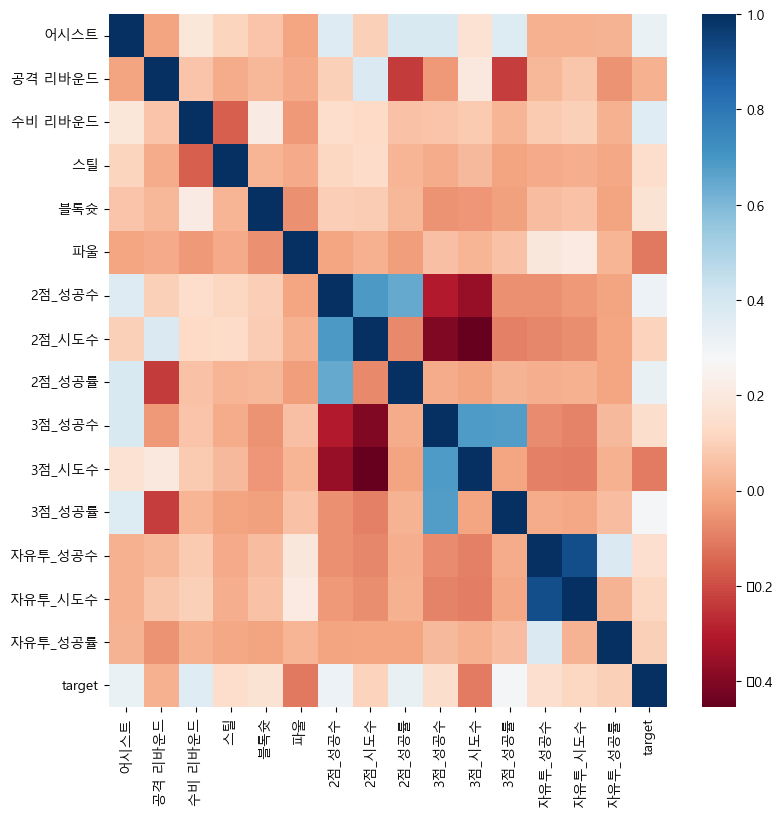

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':
    plt.rc('font', family='Malgun Gothic')

# 히트맵
plt.figure(figsize=(9,9))
sns.heatmap(DF.corr(),cmap='RdBu')

In [14]:
DF.corr().target

어시스트       0.321864
공격 리바운드    0.015518
수비 리바운드    0.361110
스틸         0.136713
블록슛        0.169899
파울        -0.109661
2점_성공수     0.317306
2점_시도수     0.102271
2점_성공률     0.324291
3점_성공수     0.145120
3점_시도수    -0.106904
3점_성공률     0.288890
자유투_성공수    0.152621
자유투_시도수    0.118734
자유투_성공률    0.099999
target     1.000000
Name: target, dtype: float64

<Axes: >

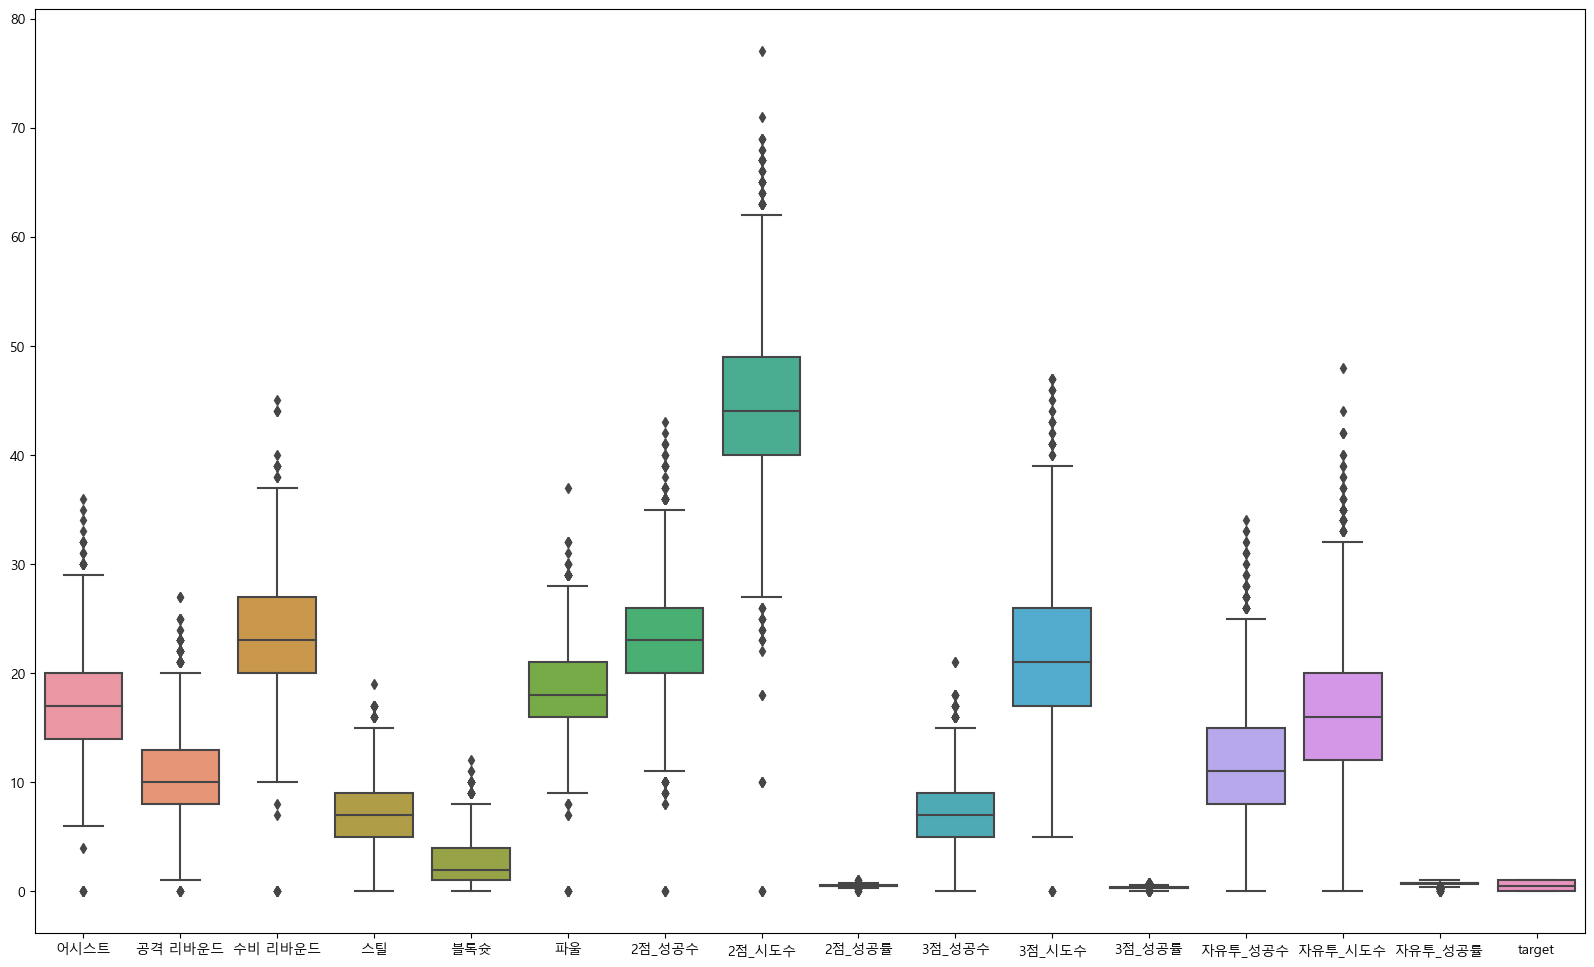

In [15]:
plt.figure(figsize=(20,12))
sns.boxplot(DF)

- feature가 모든 열일때

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
featureDF=DF.iloc[:,:-1]
targetDF=DF.iloc[:,-1]

- train, test, val 분리

In [18]:
# train, test 분리
train_X,test_X,train_Y,test_Y=train_test_split(featureDF,targetDF,test_size=0.3, random_state=10)

- scale 진행

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
scale=StandardScaler()

scale.fit(train_X)

test_X_scaled=scale.transform(test_X)
train_X_scaled=scale.transform(train_X)


- 모델 적용

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [22]:
trainModels=[KNeighborsClassifier, LogisticRegression, SGDClassifier, DecisionTreeClassifier, SVC, RandomForestClassifier,XGBClassifier]

In [23]:
models_={}
for model in trainModels:
    model_=model()
    model_.fit(train_X_scaled,train_Y)

    train_score=model_.score(train_X_scaled,train_Y)
    test_score=model_.score(test_X_scaled,test_Y)

    models_[model]=[train_score, test_score]

    # # __name__ 매직속성 => 객체 클래스명 str타입으로 가져오기
    models_[model.__name__]=[train_score,test_score,round(train_score-test_score,4)]


    print(f'[{model.__name__}]\n 훈련 점수 : {train_score:.4f}, 테스트 점수 : {test_score:.4f}\n')


[KNeighborsClassifier]
 훈련 점수 : 0.8575, 테스트 점수 : 0.7826

[LogisticRegression]
 훈련 점수 : 0.8061, 테스트 점수 : 0.8152

[SGDClassifier]
 훈련 점수 : 0.7846, 테스트 점수 : 0.7991

[DecisionTreeClassifier]
 훈련 점수 : 1.0000, 테스트 점수 : 0.7772

[SVC]
 훈련 점수 : 0.8561, 테스트 점수 : 0.8166

[RandomForestClassifier]
 훈련 점수 : 1.0000, 테스트 점수 : 0.8425

[XGBClassifier]
 훈련 점수 : 0.9956, 테스트 점수 : 0.8403



- 튜닝
    * LogisticRegression
    * SGD Classifier
    * SVC

In [24]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [25]:
trainModels=[LogisticRegression(), SGDClassifier(), SVC()]

In [26]:
params={'LogisticRegression':{"penalty":["l1","l2","elasticnet"], "C":[0.001,0.01, 0.1, 1.0, 10.0,100],"max_iter":[100,500,1000]},
        'SGDClassifier':{"penalty":["l1","l2","elasticnet"],"alpha":[0.001,0.01,0.1,1,10]},
        'SVC':{"C":[0.001,0.01, 0.1, 1.0, 10.0,100],"gamma":['auto','scale',100,10,1,0.1,0.01]}}

In [27]:
gridResult=[]
for model in trainModels:
    model_name = model.__class__.__name__
    if model_name in params.keys():
        param_grid_ = params[model_name]
        gridCV = GridSearchCV(model, param_grid=param_grid_)
        gridCV.fit(train_X_scaled, train_Y)
        gridResult.append(gridCV.best_estimator_)
        gridResult.append(gridCV.best_score_)

c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "c:\Users\KDP-48\anaconda3\envs\MY_PYTHON\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fi

In [28]:
gridResult

[LogisticRegression(C=0.1),
 0.8074040813171809,
 SGDClassifier(alpha=0.001, penalty='l1'),
 0.8079813692600151,
 SVC(C=10.0, gamma=0.1),
 0.8233246780014097]

In [29]:
est1=gridResult[0]
est2=gridResult[2]
est3=gridResult[4]

print('Logist : trains_score',est1.score(train_X_scaled,train_Y), 'test_score',est1.score(test_X_scaled,test_Y))
print('SGD : trains_score',est2.score(train_X_scaled,train_Y), 'test_score',est2.score(test_X_scaled,test_Y))
print('SVC : trains_score',est3.score(train_X_scaled,train_Y), 'test_score',est3.score(test_X_scaled,test_Y))

Logist : trains_score 0.8070209092652983 test_score 0.814317673378076
SGD : trains_score 0.8054862842892768 test_score 0.8178970917225951
SVC : trains_score 0.9553040475733743 test_score 0.8277404921700223


- 예측

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# accuracy, precision, recall 평가 함수

def get_clf_eval(y_test, pred, pred_proba_):
    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)

    f1=f1_score(y_test,pred)
    roc_auc=roc_auc_score(y_test,pred_proba_)

    print(f'정확도 : {accuracy:.4f}, 정밀도 : {precision:.4f}, 재현율 : {recall:.4f}, F1 : {f1:.4f}, AUC : {roc_auc:.4f}')


In [31]:
best=SGDClassifier(alpha=0.001,loss='log_loss')


best.fit(train_X_scaled,train_Y)
test_prod=best.predict(test_X_scaled)

test_prod_proba=best.predict_proba(test_X_scaled)[:,1]

print('SGD Classifier')
get_clf_eval(test_Y,test_prod,test_prod_proba)


SGD Classifier
정확도 : 0.8179, 정밀도 : 0.8259, 재현율 : 0.8013, F1 : 0.8134, AUC : 0.8956


In [32]:
est1.fit(train_X_scaled,train_Y)
test_prod=est1.predict(test_X_scaled)

test_prod_proba=est1.predict_proba(test_X_scaled)[:,1]

print('Logistic')
get_clf_eval(test_Y,test_prod,test_prod_proba)


Logistic
정확도 : 0.8143, 정밀도 : 0.8174, 재현율 : 0.8049, F1 : 0.8111, AUC : 0.8997


- new data

In [33]:
newDF=pd.read_csv('./data/result.csv',header=None)

In [34]:
# 1
name = ['2점','3점','자유투']
for j in range(1,4):
    sucessList = []
    tryList = []
    sucessRate = []
    for i in range(len(newDF.iloc[:,j])):
        score = newDF.iloc[:,j][i].split('/')
        if len(score) == 2:
            sucessList.append(int(score[0]))
            tryList.append(int(score[1]))
            sucessRate.append(round(int(score[0])/int(score[1]),3))
        else:
            sucessList.append(0)
            tryList.append(0)
            sucessRate.append(0)

    newDF[f'{name[j-1]}_성공수'] = sucessList
    newDF[f'{name[j-1]}_시도수'] = tryList
    newDF[f'{name[j-1]}_성공률'] = sucessRate

In [35]:
# 2
newDF=newDF.drop(newDF.iloc[:,:5],axis=1)
newDF=newDF.rename(columns={5:'어시스트',6:'공격 리바운드',7:'수비 리바운드',8:'스틸',9:'블록슛',10:'파울'})

In [36]:
# 3
total=[]
target=[]

for i in range(len(newDF)):
    two_=newDF.iloc[i][6]*2
    three_=newDF.iloc[i][9]*3
    one_=newDF.iloc[i][12]*1
    total_=two_+three_+one_
    total.append(total_)


for i in range(0,len(total),2):
    if total[i]> total[i+1]:
        target.append(1)
        target.append(0)
    else:
        target.append(0)
        target.append(1)

In [37]:
# 4
newDF['target']=target
newfeatureDF=newDF.iloc[:,:-1]
newtargetDF=newDF.iloc[:,-1]

In [38]:
# 5
newfeatureDF_scaled=scale.transform(newfeatureDF)

In [39]:
targetDF.shape

(7448,)

In [1]:
print('SGD score:', est2.score(newfeatureDF_scaled,newtargetDF))

print(get_clf_eval(newtargetDF,est1.predict(newfeatureDF_scaled),est1.predict_proba(newfeatureDF_scaled)[:,1]))

NameError: name 'est2' is not defined